In [1]:
import sys
import os
from pathlib import Path

# 1. Xử lý đường dẫn TRƯỚC
project_root = Path.cwd().parent  # Trỏ về thư mục gốc của project
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

# Thử chuyển CWD nếu cần (tùy chọn)
try:
    if Path(os.getcwd()).name == 'notebooks':
        os.chdir('..')
        print(f"CWD đã chuyển sang: {os.getcwd()}")
except Exception as e:
    print(f"Lỗi chuyển CWD: {e}")

# 2. Sau đó mới thực hiện Import
%load_ext autoreload
%autoreload 2
from src.models import get_model

import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 1. Tải lại dữ liệu đã xử lý từ File 1
X_train = np.load('/Users/binhminh/Documents/Intro ML code /Data/X_train.npy')
X_test = np.load('/Users/binhminh/Documents/Intro ML code /Data/X_test.npy')
y_train = np.load('/Users/binhminh/Documents/Intro ML code /Data/y_train.npy')
y_test = np.load('/Users/binhminh/Documents/Intro ML code /Data/y_test.npy')

In [4]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None], # <-- BỔ SUNG
    'splitter': ['best', 'random']           # <-- BỔ SUNG
}

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': 30, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}


In [5]:
best_model_dt = grid_search.best_estimator_
# Fit the best model on the training data

model_name = "Decision Tree Classifier"
y_pred_dt = best_model_dt.predict(X_test)

acc = accuracy_score(y_test, y_pred_dt)
print(f"\nĐộ chính xác (Accuracy) của {model_name}: {acc*100:.2f}%")
print("-" * 30)
print("Báo cáo chi tiết (Precision, Recall, F1-Score):")
print(classification_report(y_test, y_pred_dt))
print("-" * 30)
print(f'F1_Score: {classification_report(y_test, y_pred_dt, output_dict=True)["weighted avg"]["f1-score"]:.4f}')
print(f'Accuracy: {classification_report(y_test, y_pred_dt, output_dict=True)["accuracy"]:.4f}')


Độ chính xác (Accuracy) của Decision Tree Classifier: 95.61%
------------------------------
Báo cáo chi tiết (Precision, Recall, F1-Score):
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

------------------------------
F1_Score: 0.9558
Accuracy: 0.9561


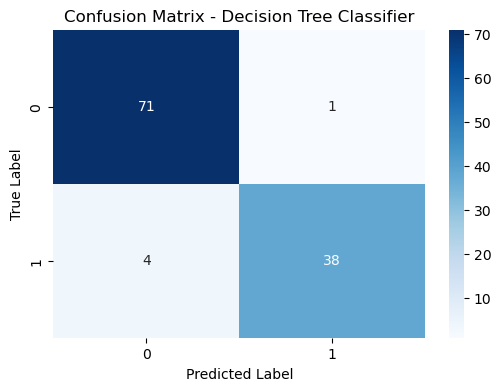

In [6]:
# 5. Vẽ Confusion Matrix (Tùy chọn để làm đẹp báo cáo)
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [7]:
import joblib
import os

os.makedirs('models', exist_ok=True)

file_path_ab = "models/decision_tree.pkl"

# Lưu mô hình AdaBoost (best_model_ab)
joblib.dump(best_model_dt, file_path_ab)

print(f"✅ Đã lưu mô hình AdaBoost tại: {file_path_ab}")

✅ Đã lưu mô hình AdaBoost tại: models/decision_tree.pkl


Exception ignored in: <function ResourceTracker.__del__ at 0x105861e40>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x105ab1e40>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x103f1de40>
Traceback (most recent call last